In [100]:
import pandas as pd
import zipfile
import requests
import plotly.express as px
import plotly.graph_objects as go

In [2]:
url =  'https://download.inep.gov.br/dados_abertos/microdados_censo_escolar_2023.zip'
arquivozip = requests.get(url)

In [3]:
arquivozip

<Response [200]>

In [4]:
nome_arquivozip = url.split('/')[-1]

In [5]:
with open(nome_arquivozip, 'wb') as arq:
    arq.write(arquivozip.content)
print('Arquivo salvo localmente')

Arquivo salvo localmente


In [6]:
with zipfile.ZipFile('./microdados_censo_escolar_2023.zip') as arq_zip:
    print(arq_zip.namelist())

['microdados_censo_escolar_2023/', 'microdados_censo_escolar_2023/Anexos/', 'microdados_censo_escolar_2023/Anexos/ANEXO I - Dicionário de Dados/', 'microdados_censo_escolar_2023/Anexos/ANEXO I - Dicionário de Dados/dicionário_dados_educaç╞o_básica.xlsx', 'microdados_censo_escolar_2023/Anexos/ANEXO II -  Questionários do Censo da Educaç╞o Basica/', 'microdados_censo_escolar_2023/Anexos/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Aluno.pdf', 'microdados_censo_escolar_2023/Anexos/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Escola.pdf', 'microdados_censo_escolar_2023/Anexos/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Gestor Escolar.pdf', 'microdados_censo_escolar_2023/Anexos/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Profissional Escolar.pdf', 'microdados_censo_escolar_2023/Anexos/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Turma.pdf', 'microdados_censo_escolar_2023/dados/', 'microdados_censo_escolar_2023/dados/md5_microdados_ed_basica_202

In [7]:
with zipfile.ZipFile('./microdados_censo_escolar_2023.zip') as arq_zip:
    with arq_zip.open('microdados_censo_escolar_2023/dados/microdados_ed_basica_2023.csv') as arq_csv:
        microdados_censo_2023 = pd.read_csv(arq_csv, sep=';', encoding='ISO 8859-1', low_memory=False)

In [9]:
len(microdados_censo_2023)

217625

In [10]:
microdados_censo_2023.head(3)

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
0,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,14.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Microdados do ENEM

In [3]:
microdados_enem_2023 = pd.read_csv('/home/aristoteles/microdados_enem/2023/DADOS/MICRODADOS_ENEM_2023.csv', 
                                   sep =';', 
                                   encoding='ISO 8859-1',
                                   engine='python',
                                   nrows=100000,
                                  )
microdados_enem_2023

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,210061381642,2023,7,F,1,1,1,1,1,1,...,A,A,B,B,A,A,D,A,B,B
99996,210059149704,2023,3,F,1,3,1,2,0,2,...,B,A,A,B,A,A,A,A,A,B
99997,210061153953,2023,12,F,2,3,1,1,17,1,...,B,A,A,B,A,A,C,A,C,B
99998,210060396713,2023,4,F,1,3,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B


In [9]:
microdados_enem_2023.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [16]:
microdados_enem_2023.groupby('TP_COR_RACA').count().reset_index()

,TP_COR_RACA,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,0,1138,1138,1138,1138,1138,1138,1138,1138,1138,...,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138
1,1,37346,37346,37346,37346,37346,37346,37346,37346,37346,...,37346,37346,37346,37346,37346,37346,37346,37346,37346,37346
2,2,14229,14229,14229,14229,14229,14229,14229,14229,14229,...,14229,14229,14229,14229,14229,14229,14229,14229,14229,14229
3,3,45273,45273,45273,45273,45273,45273,45273,45273,45273,...,45273,45273,45273,45273,45273,45273,45273,45273,45273,45273
4,4,1487,1487,1487,1487,1487,1487,1487,1487,1487,...,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
5,5,527,527,527,527,527,527,527,527,527,...,527,527,527,527,527,527,527,527,527,527


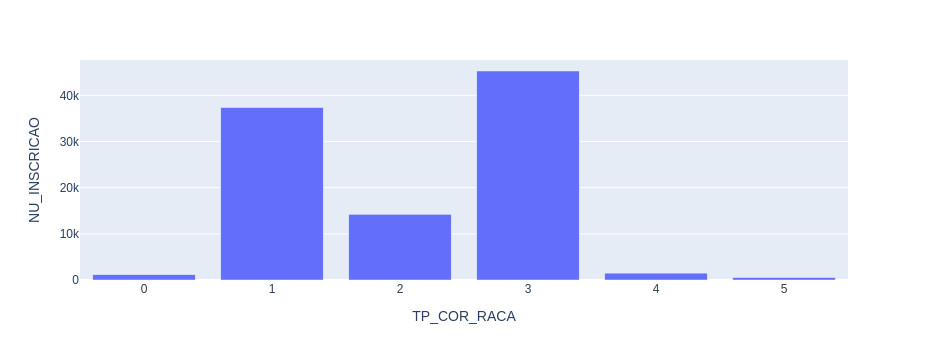

In [20]:
microdados_enem_2023.groupby('TP_COR_RACA').count().reset_index().plot.bar(x='TP_COR_RACA', y='NU_INSCRICAO')

In [7]:
tipo_cor_raca = [
    'Não declarado','Branca','Preta','Parda','Amarela','Indígena','Não dispõe da informação'
]

In [21]:
microdados_enem_2023['TP_COR_RACA_DIC'] = [tipo_cor_raca[resp] for resp in microdados_enem_2023.TP_COR_RACA]

In [42]:
microdados_enem_2023[['TP_COR_RACA_DIC', 'TP_COR_RACA']].groupby('TP_COR_RACA_DIC').count().reset_index()

,TP_COR_RACA_DIC,TP_COR_RACA
0,Amarela,1487
1,Branca,37346
2,Indígena,527
3,Não declarado,1138
4,Parda,45273
5,Preta,14229


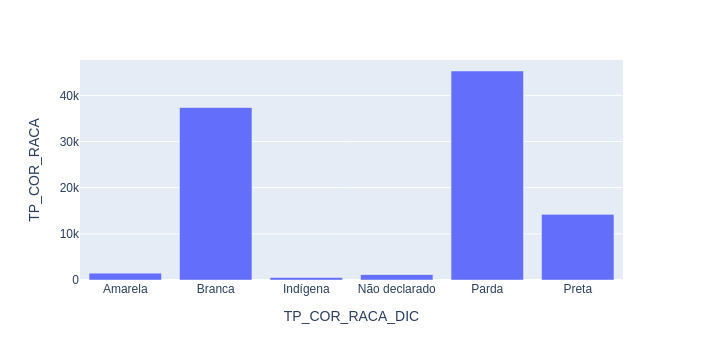

In [43]:
microdados_enem_2023[['TP_COR_RACA_DIC', 'TP_COR_RACA']].groupby('TP_COR_RACA_DIC').count().reset_index().plot(x='TP_COR_RACA_DIC', y='TP_COR_RACA', kind= 'bar')

In [44]:
microdados_enem_2023[['TP_COR_RACA_DIC', 'TP_COR_RACA']].groupby('TP_COR_RACA_DIC').count().sort_values(
    'TP_COR_RACA', ascending=False).reset_index().TP_COR_RACA/100000

0    0.45273
1    0.37346
2    0.14229
3    0.01487
4    0.01138
5    0.00527
Name: TP_COR_RACA, dtype: float64

In [49]:
tipo_escola = ['Não Respondeu', 'Pública', 'Privada']

In [51]:
tipo_escola[0]

'Não Respondeu'

In [60]:
microdados_enem_2023.TP_ESCOLA.min()

np.int64(1)

In [62]:
microdados_enem_2023['TP_ESCOLA_DIC'] = [tipo_escola[resp - 1] for resp in microdados_enem_2023.TP_ESCOLA]

In [114]:
def tabela(campo, campo_dic): 
    dados = microdados_enem_2023[[campo_dic, campo]].groupby(campo_dic).count().reset_index()
    return dados

In [88]:
tabela('TP_ESCOLA', 'TP_ESCOLA_DIC')

,TP_ESCOLA_DIC,TP_ESCOLA
0,Não Respondeu,61762
1,Privada,3582
2,Pública,34656


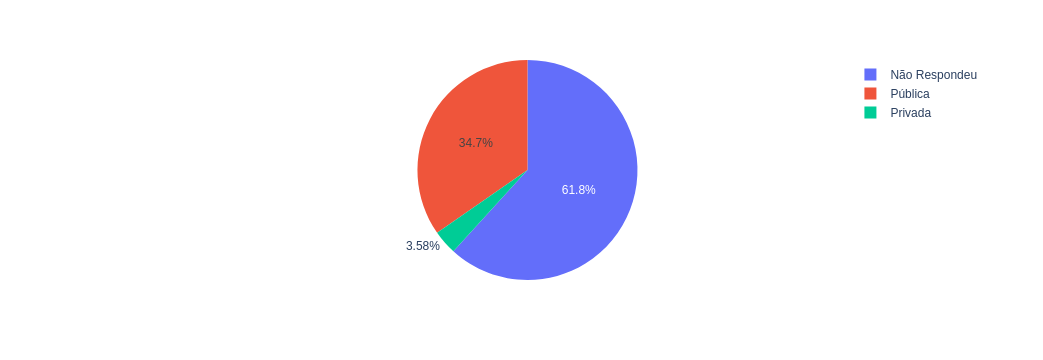

In [110]:
fig = px.pie(tabela('TP_ESCOLA', 'TP_ESCOLA_DIC'), values='TP_ESCOLA', names='TP_ESCOLA_DIC')
fig.show()